In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
insurance = pd.read_csv("/content/insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Axes: xlabel='region', ylabel='charges'>

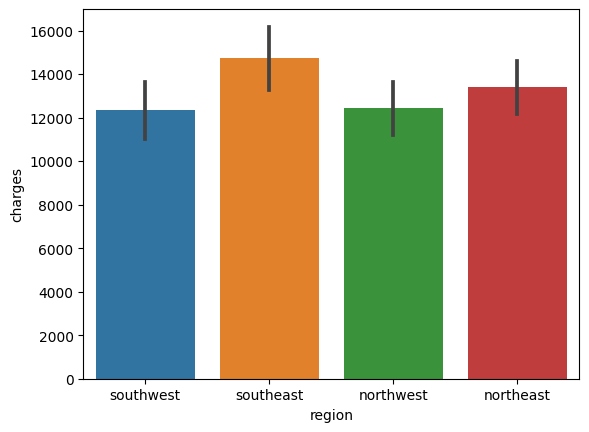

In [5]:
sns.barplot(data=insurance, x = 'region', y='charges')

In [6]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='children', ylabel='charges'>

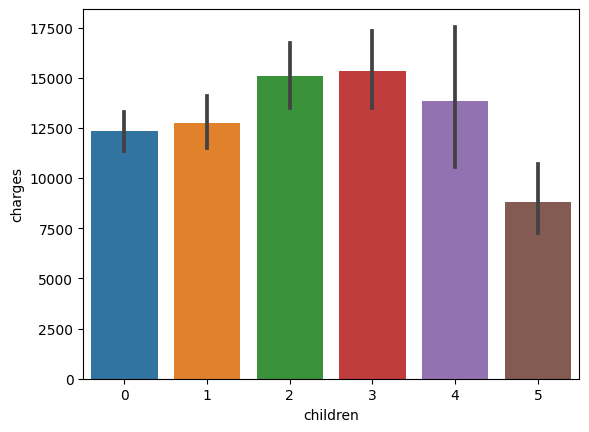

In [8]:
sns.barplot(data=insurance, x = 'children', y='charges')

In [9]:
insurance.replace({'sex':{'female':0, 'male':1},
                   'smoker':{'no':0, 'yes':1},
                  'region': {'northeast': 0, 'northwest':1, 'southeast':2, 'southwest':3}}, inplace=True)

In [10]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [11]:
sns.set()

<ipython-input-12-0dcc27228240>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['age'])


Text(0.5, 1.0, 'Age Distribution')

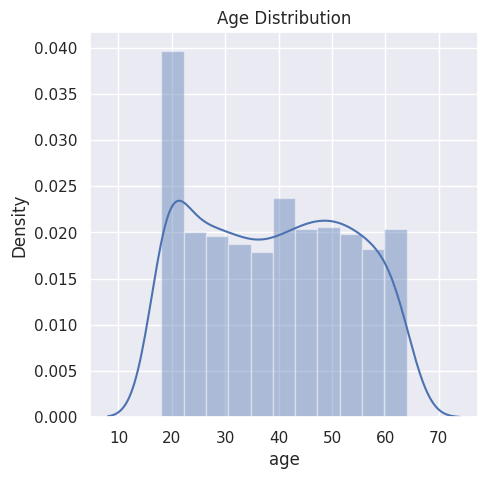

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(insurance['age'])
plt.title('Age Distribution')

<Axes: xlabel='age', ylabel='charges'>

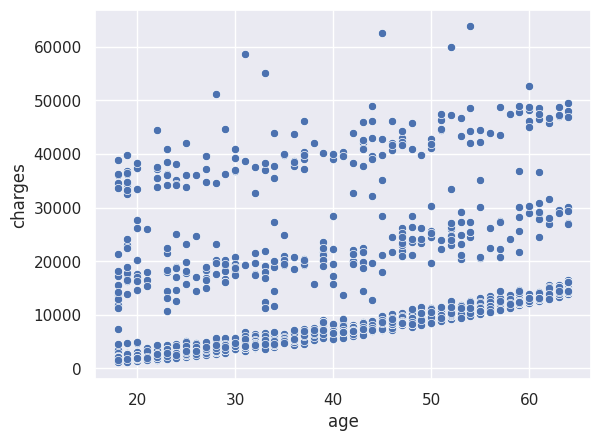

In [14]:
sns.scatterplot(x='age', y='charges', data = insurance)

<Axes: xlabel='sex', ylabel='count'>

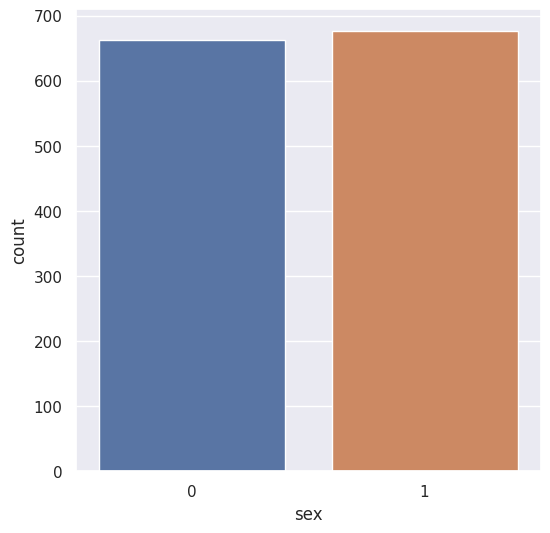

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance)

<ipython-input-18-b49370d9a22e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

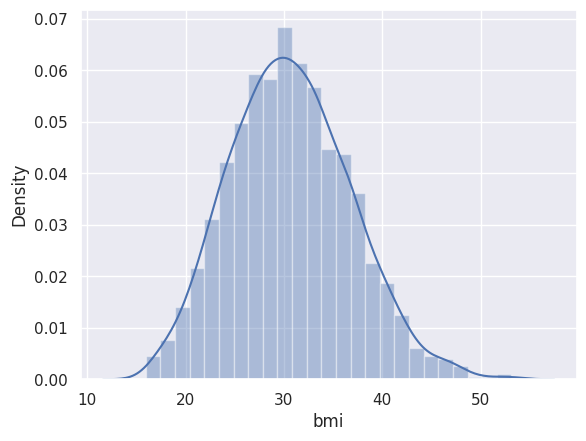

In [18]:
sns.distplot(insurance['bmi'])

<ipython-input-25-2eea93fec20a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'])


<Axes: xlabel='charges', ylabel='Density'>

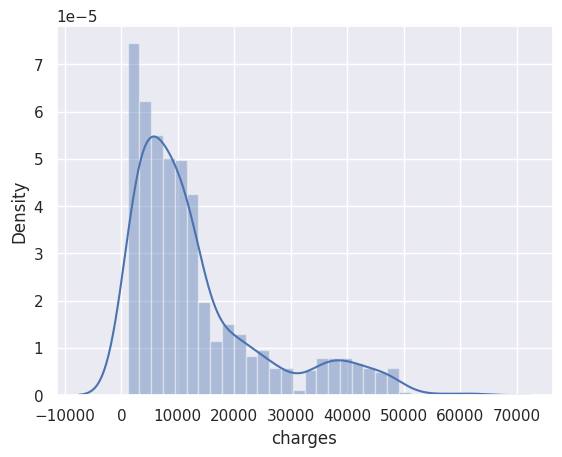

In [25]:
sns.distplot(insurance['charges'])

In [19]:
# splitting

X = insurance.drop('charges', axis = 1)
Y = insurance['charges']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=3)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, Y_train)

LinearRegression()

In [23]:
predict_train = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, predict_train)
r2_train

0.7530732192579027

In [24]:
predict_test = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, predict_test)
r2_test

0.7406256738597919